In [1]:
#Import the required libraries
import os
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the data
data = dd.read_csv('Test.csv')
data.info()

<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 11 entries, Item_Identifier to Outlet_Type
dtypes: float64(3), int64(1), string(7)

In [3]:
#Convert the data to pandas dataframe
data = data.compute()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   string 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   string 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   string 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   string 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   string 
 9   Outlet_Location_Type       5681 non-null   string 
 10  Outlet_Type                5681 non-null   string 
dtypes: float64(3), int64(1), string(7)
memory usage: 795.9 KB
None


In [4]:
#create a copy of the data
data1 = data.copy(deep=True)


In [5]:
#Check for missing values
missing_values = data1.isnull().sum()
print(missing_values)


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [6]:
#Drop the missing values
data1 = data1.dropna()
print(data1.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [7]:
#Check for duplicates
duplicates = data1.duplicated().sum()
print(duplicates)

0


In [8]:
#Check the first 5 rows of the data
print(data1.head())

   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDW58       20.750          Low Fat         0.007565   
5            FDH56        9.800          Regular         0.063817   
6            FDL48       19.350          Regular         0.082602   
13           FDU11        4.785          Low Fat         0.092738   
14           DRL59       16.750               LF         0.021206   

                Item_Type  Item_MRP Outlet_Identifier  \
0             Snack Foods  107.8622            OUT049   
5   Fruits and Vegetables  117.1492            OUT046   
6            Baking Goods   50.1034            OUT018   
13                 Breads  122.3098            OUT049   
14            Hard Drinks   52.0298            OUT013   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                        1999      Medium               Tier 1   
5                        1997       Small               Tier 1   
6                        2009      Medium   

In [9]:
#Check the last 5 rows of the data
print(data1.tail())

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
5673           FDF46         7.07          Low Fat         0.094053   
5674           DRL35        15.70          Low Fat         0.030704   
5675           FDW46        13.00          Regular         0.070411   
5676           FDB58        10.50          Regular         0.013496   
5677           FDD47         7.60          Regular         0.142991   

          Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
5673    Snack Foods  116.0834            OUT018                       2009   
5674    Hard Drinks   43.2770            OUT046                       1997   
5675    Snack Foods   63.4484            OUT049                       1999   
5676    Snack Foods  141.3154            OUT046                       1997   
5677  Starchy Foods  169.1448            OUT018                       2009   

     Outlet_Size Outlet_Location_Type        Outlet_Type  
5673      Medium               Tier 3  Superm

In [10]:
#Check the shape of the data
print(data1.shape)

(3099, 11)


In [11]:
#Check the memory usage of the data
print(data1.memory_usage())

Index                        24792
Item_Identifier              40675
Item_Weight                  24792
Item_Fat_Content             46149
Item_Visibility              24792
Item_Type                    60123
Item_MRP                     24792
Outlet_Identifier            43774
Outlet_Establishment_Year    24792
Outlet_Size                  41292
Outlet_Location_Type         43774
Outlet_Type                  77863
dtype: int64


In [12]:
#Check the columns of the data
print(data1.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [13]:
#Check the data types of the columns
print(data1.dtypes)

Item_Identifier              string[pyarrow]
Item_Weight                          float64
Item_Fat_Content             string[pyarrow]
Item_Visibility                      float64
Item_Type                    string[pyarrow]
Item_MRP                             float64
Outlet_Identifier            string[pyarrow]
Outlet_Establishment_Year              int64
Outlet_Size                  string[pyarrow]
Outlet_Location_Type         string[pyarrow]
Outlet_Type                  string[pyarrow]
dtype: object


In [14]:
#Summary of numerical variables
data1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,3099.000000,3099.000000,3099.000000,3099.000000
mean,12.658206,0.059063,140.036189,1999.189739
std,4.616934,0.043592,61.608135,7.387906
min,4.555000,0.000000,31.990000,1987.000000
25%,8.675000,0.025824,93.310700,1997.000000
50%,12.350000,0.049154,141.315400,1999.000000
75%,16.600000,0.085354,184.993700,2004.000000
max,21.350000,0.185913,266.588400,2009.000000


In [15]:
#Summary of categorical variables
data1.describe(exclude=[np.number])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,3099,3099,3099,3099,3099,3099,3099
unique,1449,5,16,5,3,3,2
top,FDZ02,Low Fat,Snack Foods,OUT013,Small,Tier 1,Supermarket Type1
freq,5,1868,437,621,1240,1240,2481


In [16]:
#Cross tabulation of two columns
Weight_Fat_Content=pd.crosstab(index=data1['Item_Weight'],columns=data1['Item_Fat_Content'])
print(Weight_Fat_Content)


Item_Fat_Content  LF  Low Fat  Regular  low fat  reg
Item_Weight                                         
4.555              0        0        1        0    0
4.590              0        1        0        0    0
4.610              0        1        0        0    0
4.615              0        0        2        0    0
4.635              0        2        0        0    0
...               ..      ...      ...      ...  ...
21.000             0        0        0        1    0
21.100             0        2        4        0    0
21.200             0        5        2        0    0
21.250             0       11        0        0    0
21.350             0        5        0        0    0

[401 rows x 5 columns]


In [17]:
#Group by
grouped = data1.groupby('Item_Type')
print(grouped['Item_MRP'].mean())

Item_Type
Baking Goods             129.157803
Breads                   139.191904
Breakfast                139.022248
Canned                   138.378773
Dairy                    142.332602
Frozen Foods             131.233022
Fruits and Vegetables    143.377461
Hard Drinks              132.486077
Health and Hygiene       136.405953
Household                147.688873
Meat                     141.533681
Others                   130.825708
Seafood                  130.081776
Snack Foods              144.789637
Soft Drinks              142.276118
Starchy Foods            147.547571
Name: Item_MRP, dtype: float64


In [18]:
#Plot the correlation matrix
data_encoded = pd.get_dummies(data, dtype=float)

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()
print(correlation_matrix)

                               Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                       1.000000        -0.019089  0.049809   
Item_Visibility                  -0.019089         1.000000 -0.014013   
Item_MRP                          0.049809        -0.014013  1.000000   
Outlet_Establishment_Year         0.018918        -0.097040 -0.007233   
Item_Identifier_DRA12            -0.004844        -0.011116  0.000109   
...                                    ...              ...       ...   
Outlet_Location_Type_Tier 3      -0.022978         0.030666  0.003107   
Outlet_Type_Grocery Store        -0.016171         0.286750  0.005788   
Outlet_Type_Supermarket Type1     0.010457        -0.155995 -0.006942   
Outlet_Type_Supermarket Type2     0.000278        -0.049538 -0.005879   
Outlet_Type_Supermarket Type3          NaN        -0.018848  0.010248   

                               Outlet_Establishment_Year  \
Item_Weight                                     0.018918   
Ite

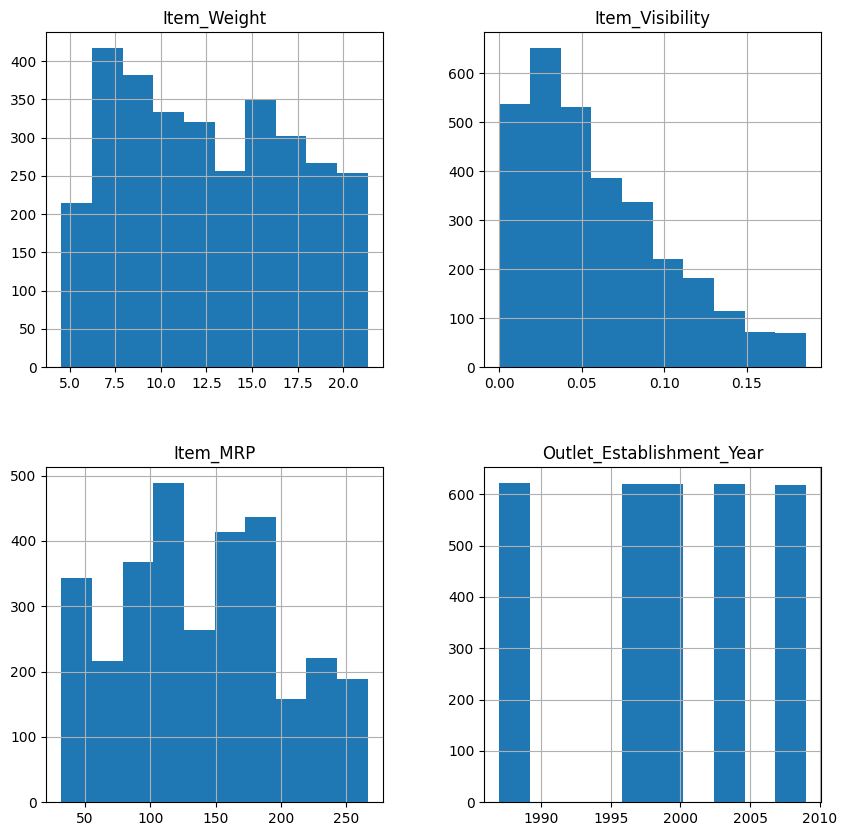

In [19]:
#Exploratory Data Analysis
#Univariate Analysis
#Histogram
data1.hist(figsize=(10,10))
plt.show()




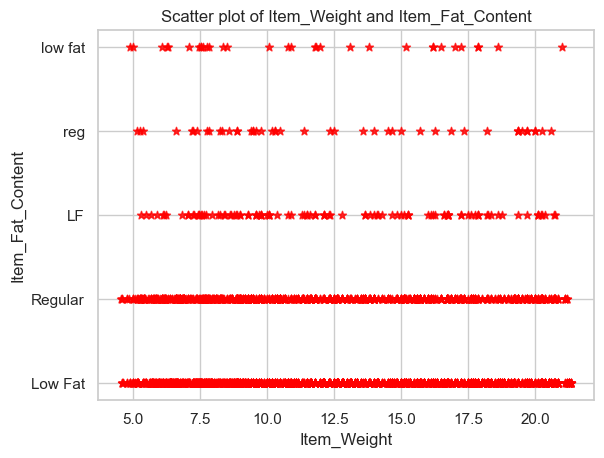

In [20]:
#Scatter plot of Item_Weight and Item_MRP
sns.set(style='whitegrid')
sns.regplot(x='Item_Weight', y='Item_Fat_Content',data=data1,marker='*',color='red',fit_reg=False)
plt.title('Scatter plot of Item_Weight and Item_Fat_Content')
plt.show()


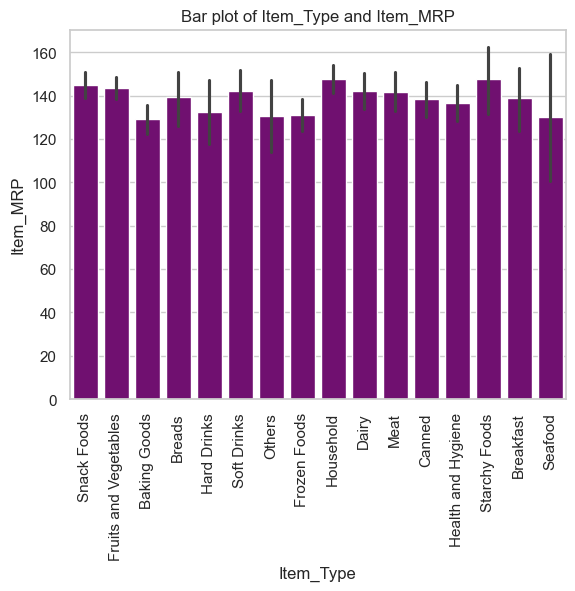

In [21]:
#Bar plot of Item_Type and Item_Outlet_Sales
sns.set(style='whitegrid')
sns.barplot(x='Item_Type', y='Item_MRP', data=data1,color='purple')
plt.title('Bar plot of Item_Type and Item_MRP')
plt.xticks(rotation=90)
plt.show()

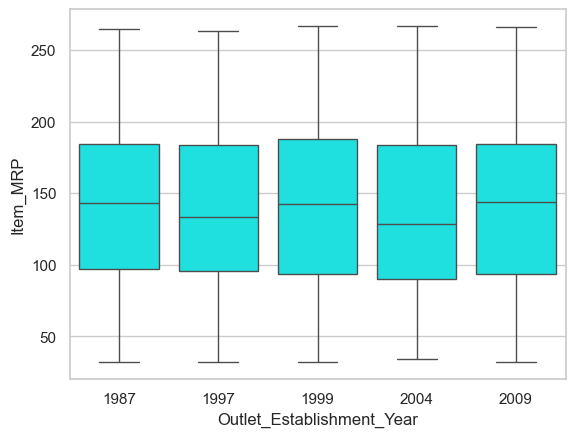

In [22]:
#Box plot of Outlet_Establishment_Year
sns.set(style='whitegrid')
sns.boxplot(x=data1['Outlet_Establishment_Year'],y=data1['Item_MRP'],color='cyan')
plt.show()            

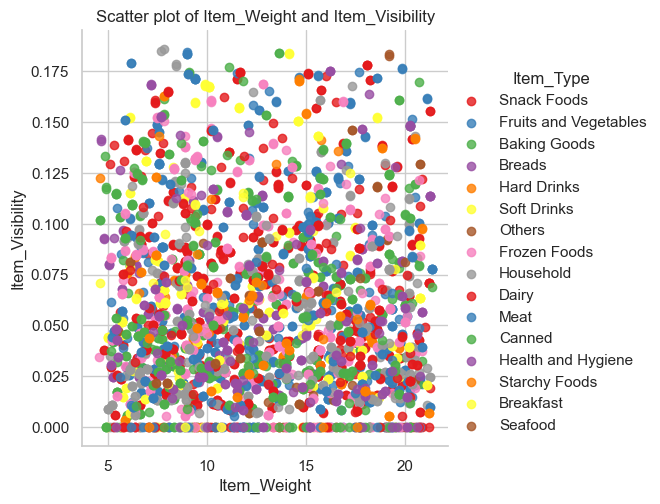

In [23]:
#Scatterplot of Item_Weight and Item_Visibility
sns.set(style='whitegrid')
sns.lmplot(x='Item_Weight',y='Item_Visibility',data=data1,fit_reg=False,hue='Item_Type',legend=True,palette='Set1')
plt.title('Scatter plot of Item_Weight and Item_Visibility')
plt.show()

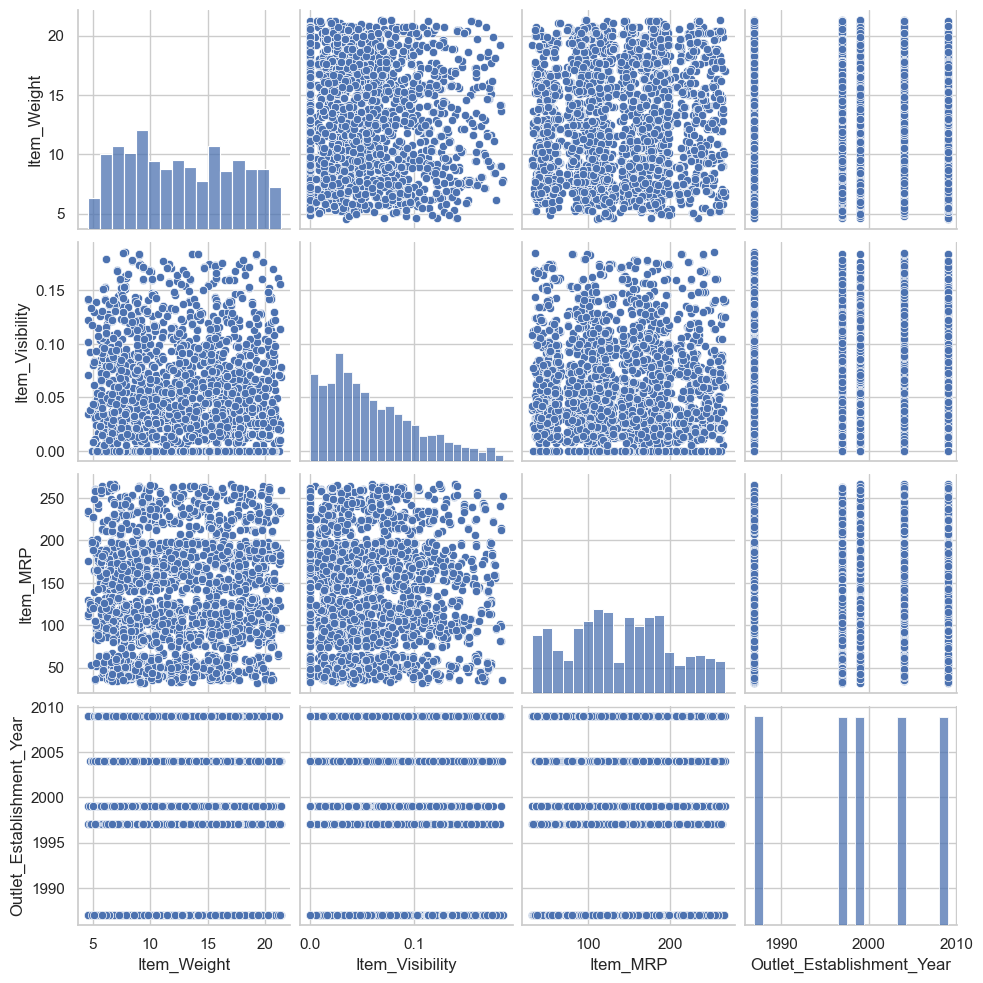

In [24]:
#Build a pairplot
sns.pairplot(data1)
plt.show()


In [ ]:
#Conclusion
#The data has been successfully cleaned and explored. 
#The missing values and duplicates have been removed. 
#The data has been converted to a pandas dataframe for further analysis. 
#The data has been explored using various plots such as histograms, scatter plots, bar plots, box plots and pair plots.
#The data has been analyzed using group by and cross tabulation. 
#The data has been summarized using describe and info functions. 
#The data has been visualized using seaborn and matplotlib libraries.

